In [1]:
import math, numpy as np, pandas as pd, pandas_datareader as web, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831


C:\Users\piyus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Closing Price in usd')

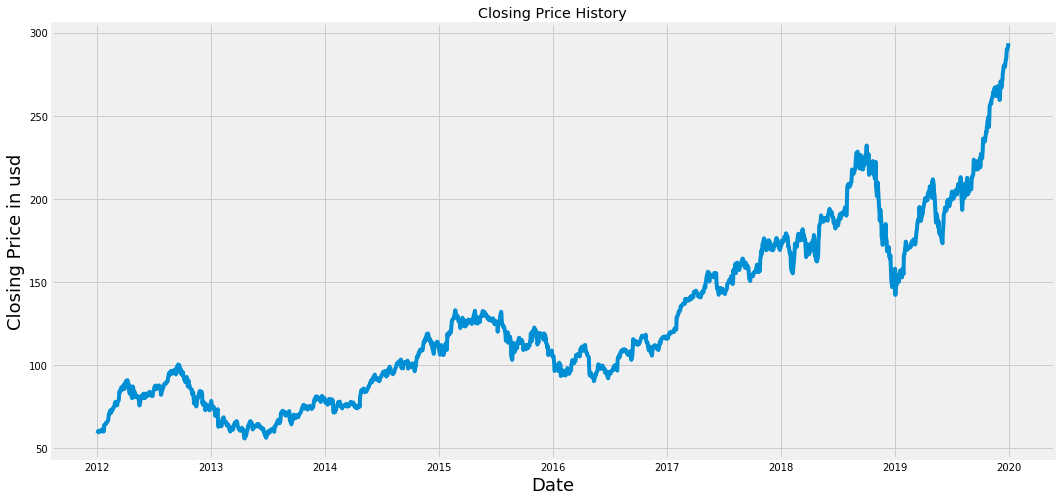

In [3]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in usd', fontsize=18)

In [4]:
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset)*0.8)
train_data_len

1610

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01243228],
       [0.0137596 ],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [6]:
train_data = scaled_data[0:train_data_len, :]
x_train, y_train = [],[]
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print("x: " + str(x_train))
        print("y: "+str(y_train))
        print()

x: [array([0.01243228, 0.0137596 , 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758538, 0.02052227,
       0.02317089, 0.02235408, 0.01787967, 0.02214988, 0.01794572,
       0.0337113 , 0.03249209, 0.03408368, 0.03752507, 0.03960912,
       0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
       0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
       0.06434756, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
       0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123616,
       0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
       0.09096586, 0.09287577, 0.0969778 , 0.10664737, 0.11954812,
       0.11713373, 0.11713972, 0.12646695, 0.12938582, 0.12730777,
       0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876])]
y: [0.13172814323221588]



In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train, (1550,60,1))

In [9]:
#Building LSTM model:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1550/1550 [==============================] - 200s 129ms/step - loss: 7.0895e-04


In [12]:
#create testing dataset
test_data = scaled_data[train_data_len-60:,:]
x_test=[]
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [14]:
#get model prediction on price values:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Root mean square error:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.7994735869602185

C:\Users\piyus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


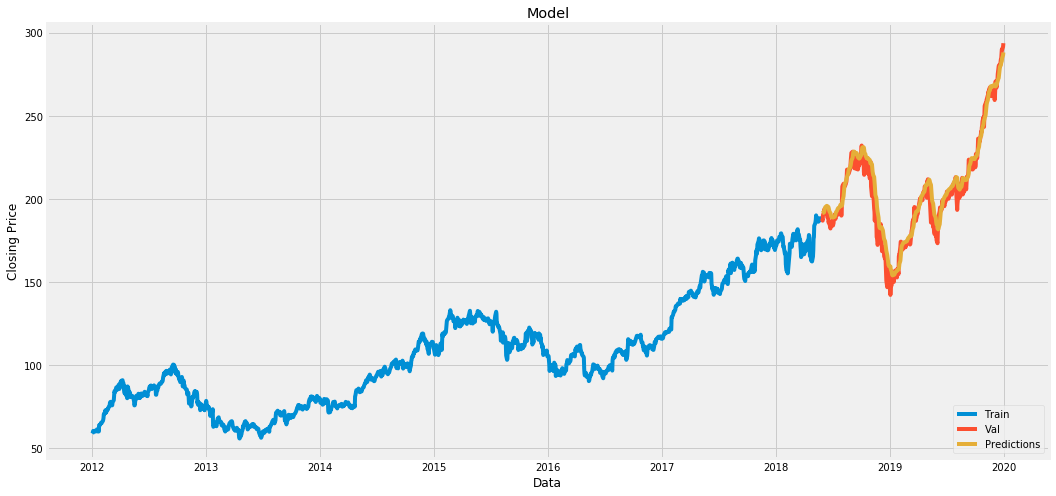

In [20]:
#plot data:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')

In [21]:
valid

,Close,Predictions
Date,,
2018-05-29,187.899994,191.530838
2018-05-30,187.500000,191.625473
2018-05-31,186.869995,191.626938
2018-06-01,190.240005,191.511230
2018-06-04,191.830002,191.758652
...,...,...
2019-12-24,284.269989,281.750916
2019-12-26,289.910004,282.973511
2019-12-27,289.799988,284.705048


In [22]:
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2019-12-31')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[289.8257]], dtype=float32)

In [24]:
apple_quote1 = web.DataReader('AAPL', data_source = 'yahoo', start='2019-12-31', end='2019-12-31')
apple_quote1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-30,292.690002,285.220001,289.459991,291.519989,36028600,290.829773
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400,292.954712
